In [1]:
#Author: Andrii Trokoz 
#Student Number 20134421
#27th of September 2018
'''
Importing all the necessary libraries and frameworks in order to start image processing 
'''

import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd

In [2]:
#Part3 of the assignment_1

#Screenshot from the SLicer, transverse plane for each of all four modalities, patient 0221

#IMPORTANT! To read this image put it into the same derictory with .ipynb file and use the path './slicer_scr.png' or use the same algorithm as in this code

slicer_scr=sitk.ReadImage('C://Image Processing/Assignments/1/slicer_scr.png')
slicer_image=sitk.GetArrayFromImage(slicer_scr)

plt.figure(figsize=(25,15))
plt.imshow(slicer_image)

RuntimeError: Exception thrown in SimpleITK ReadImage: C:\Users\dashboard\Miniconda3\conda-bld\simpleitk_1520871257773\work\Code\IO\src\sitkImageReaderBase.cxx:89:
sitk::ERROR: The file "C://Image Processing/Assignments/1/slicer_scr.png" does not exist.

In [ ]:
# For the 4th part of the Assignment I used MatLab function

#To use this function first you should download it from here: https://github.com/xiangruili/dicm2nii/blob/master/dicm2nii.m

#Then open matlab, copy this function to you working directory or go to dicm2nii directory 

#Than the following pipeline should be used:

"""
source_path = 'C://Image Processing/ProstateX/PROSTATEx/'; %directory where the dicom files currently situated 

nifti_folder = 'C://Image Processing/ProstateX/nifti_folder/'; %folder to which converted files should be placed

%fmt is optional parameter and the output nii.gz by deafult, other formats also apply


dcm2nii(source_path, nifti_folder, 1);
"""

#I hope this approach is acceptable and won`t affect my marks 

In [ ]:
'''
After using MATLAB function 'dicm2nii' to convert all of our DICOM files to NIFTI we have all of our files in one directory. 
So using the followin pipelines we sort our files to different dirrectories for each modality. 

It was not necessary, but good for hands-on manipulation of data using OS libraries and understanding how it works.

On the other hand, the variables "matching_modality_name" will be used in the following sections for determining lists of necessary 
images for plotting. 

We didn`t move any ktrans images, as we downloaded them separately and already have separate folder. 

'''

#moving t2 images from following directory to new one

prostate_dir=os.listdir('C://Image Processing/ProstateX/nifti_folder/')
matching_t2=[i for i in prostate_dir if 't2' in i]

new_dir='C://Image Processing/ProstateX/t2/'
curr_dir='C://Image Processing/ProstateX/nifti_folder/'
for i in prostate_dir:
    if i in matching_images:
        shutil.move(os.path.join(curr_dir,i), os.path.join(new_dir,i))
        
#moving ADC and BVAL images to their directories
prostate_dir=os.listdir('C://Image Processing/ProstateX/nifti_folder/')
matching_adc=[i for i in prostate_dir if 'ADC' in i]

new_adc_dir='C://Image Processing/ProstateX/ADC/'
curr_dir='C://Image Processing/ProstateX/nifti_folder/'
for i in matching_adc:
    shutil.move(os.path.join(curr_dir,i), os.path.join(new_adc_dir,i))

#moving BVAL from one folder to own one

prostate_dir=os.listdir('C://Image Processing/ProstateX/nifti_folder/')
matching_bval=[i for i in prostate_dir if 'BVAL' in i]

new_bval_dir='C://Image Processing/ProstateX/BVAL/'
curr_dir='C://Image Processing/ProstateX/nifti_folder/'

for i in matching_bval:
    shutil.move(os.path.join(curr_dir,i), os.path.join(new_bval_dir,i))
    
#moving ktrans from the following directory to new one

#getting list of files with needed file extention from the files` directories
list_of_files = {}
for (dirpath, dirnames, filenames) in os.walk('C://Image Processing/ProstateX/ktrsnt/ProstateXKtrains-train-fixed/') and os.walk('C://Image Processing/ProstateX/ktrsnt/ProstateXKtrans-test-fixedv2/ProstateXKtrans-test-fixedv2/'):
    for filename in filenames:
        if filename.endswith('.mhd') or filename.endswith('.zraw') or filename.endswith('.raw'): 
            list_of_files[filename] = os.sep.join([dirpath, filename])
            
#move ktrans files from old dirrectories to new one
new_ktrans_dir='C://Image Processing/ProstateX/ktrans/'
for file in list_of_files:
    print(new_ktrans_dir+file)
    shutil.move(list_of_files[file],new_ktrans_dir+file)


In [113]:
'''
Once the file is gathered in separated directories we can plot the spacing, size and intensity histograms. 

First of all, we can define a function which will plot these for us.

We can create new matching images lists and specify only "tra" plane.

'''

#defining directories for each modality, which is needed in order to use loop to get list of matching images in transverse plane
#after we get lists for matching images for each modality in transverse plane

t2_dir=os.listdir('C://Image Processing/ProstateX/t2/') 
t2_tra_images = [i for i in t2_dir if 'tra' in i and 'tse' in i]

adc_dir=os.listdir('C://Image Processing/ProstateX/ADC/')
adc_tra_images= [i for i in adc_dir if 'tra' in i]

bval_dir=os.listdir('C://Image Processing/ProstateX/BVAL/')
bval_tra_images=[i for i in bval_dir if 'tra' in i]

ktrans_dir=os.listdir('C://Image Processing/ProstateX/ktrans/')
ktrans_images=[i for i in ktrans_dir if i.endswith('.mhd')] #to read ktrans file we should open only '.mhd' files
#defining function plot_spacing

def plot_spacing(folder,matching_images):
    ''' 

    this function helps to plot spacing histograms 
    folder = path to folder with files, please prepare this folder and put all the files for corresponding modality there
    matching_images = for list with the names of images in needed plane


    '''    
    temp_list=[]
    
    for image in matching_images:
        image_read=sitk.ReadImage(folder+image)
        value=list(image_read.GetSpacing())
        value = [round(i,2) for i in value ]
        temp_list.append((str(value)).strip('[]'))
    
    #separating folder_name to get str for name
    name=[i for i in list(folder.split('/'))]
    
    temp_df=pd.DataFrame(temp_list)
    
    
    plt.figure(figsize=(12,7))
    plt.suptitle('Pixel Spacing (x,y,z) for'+' '+name[-2],fontsize=20)
    ax=temp_df[0].value_counts().plot(kind='bar')
    ax.set_xlabel(name[-2]+'_'+'pixel spacing (x,y,z) in mm',fontsize='large')
    ax.set_ylabel('patients count',fontsize='large')
    plt.show()
    
# in order to use plot_spacing function we should have folders for each modality
t2_folder='C://Image Processing/ProstateX/t2/'
adc_folder='C://Image Processing/ProstateX/ADC/'
bval_folder='C://Image Processing/ProstateX/BVAL/'
ktrans_folder='C://Image Processing/ProstateX/ktrans/'

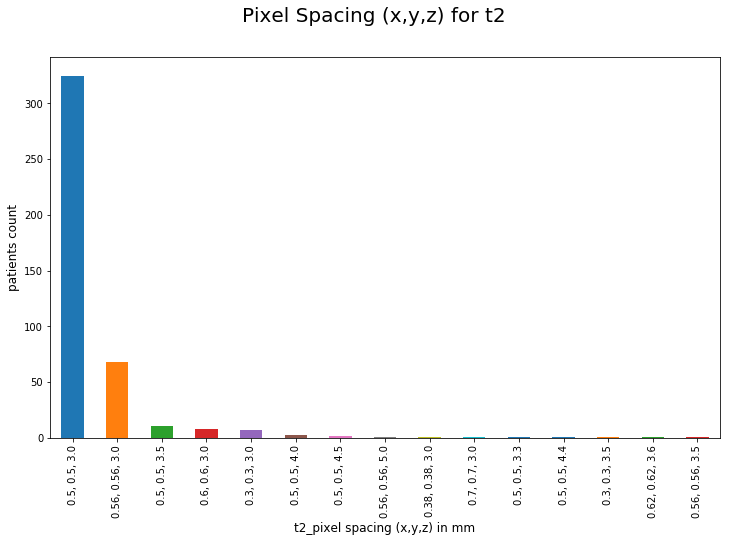

In [336]:
#using plot_spacing function we are plotting all four spacing plots spet-by-step

#First is T2 spacing histogram

plot_spacing(t2_folder,t2_tra_images)



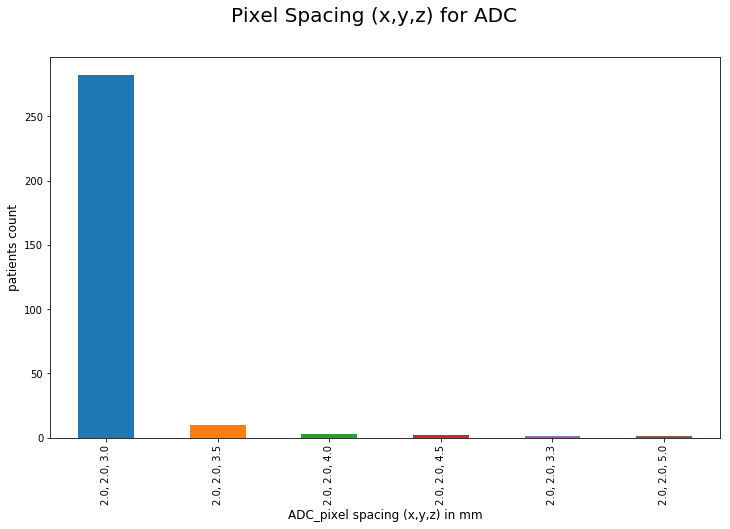

In [337]:
#ADC spacing histogram

plot_spacing(adc_folder,adc_tra_images)



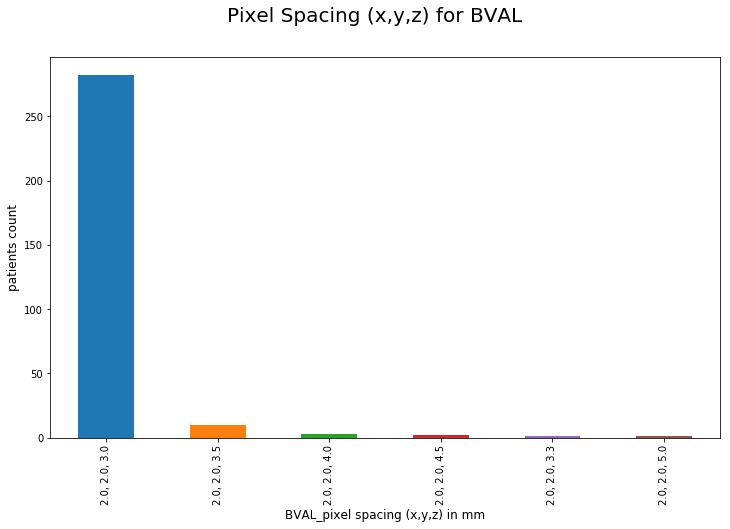

In [338]:
#BVAL spacing histogram

plot_spacing(bval_folder,bval_tra_images)



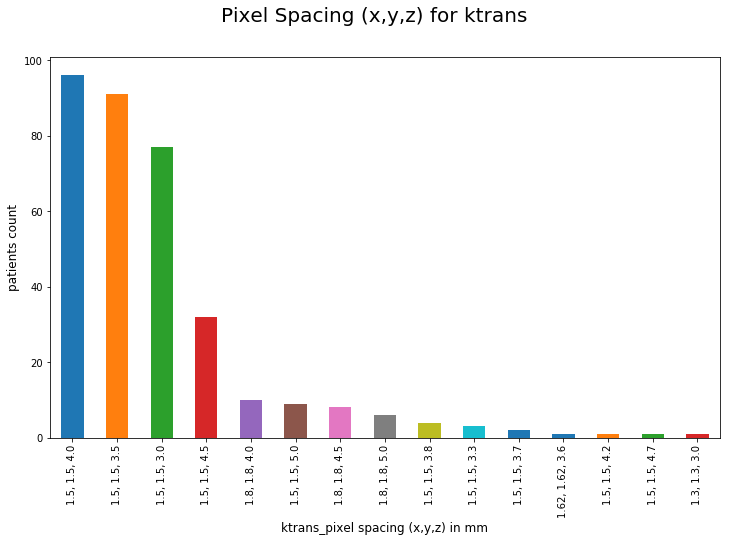

In [339]:
#Ktrans spacing histogram

plot_spacing(ktrans_folder,ktrans_images)

In [116]:
'''
The next step is defining similar function as plot_spacing, but for size for further plotting
'''

def plot_size(folder,matching_images):
    ''' 

    this function helps to plot size histogram 
    folder = path to folder with files, please prepare this folder and put all the files for corresponding modality there
    matching_images = list with the names of images in needed plane


    '''    
    temp_list=[]
    
    for image in matching_images:
        image_read=sitk.ReadImage(folder+image)
        value=list(image_read.GetSize())
        value = [round(i,2) for i in value ]
        temp_list.append((str(value)).strip('[]'))
    
    #separating folder_name to get str for name
    name=[i for i in list(folder.split('/'))]
    
    temp_df=pd.DataFrame(temp_list)
    
    plt.figure(figsize=(12,7))
    plt.suptitle('Size (width, height, depth) for'+' '+name[-2],fontsize=20)
    ax=temp_df[0].value_counts().plot(kind='bar')
    ax.set_xlabel(name[-2]+'_'+'Size (width, height, depth)',fontsize='large')
    ax.set_ylabel('patients count',fontsize='large')
    plt.show()


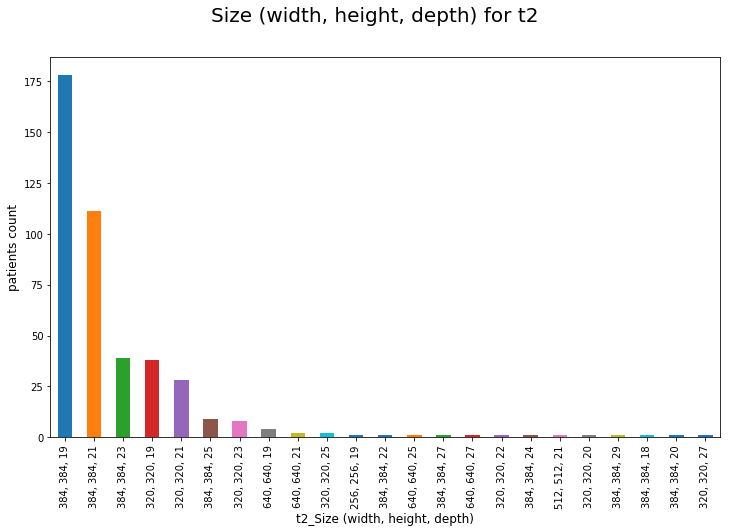

In [344]:
#plotting every Size histogram step-by-step
#T2 Size histogram
plot_size(t2_folder,t2_tra_images)



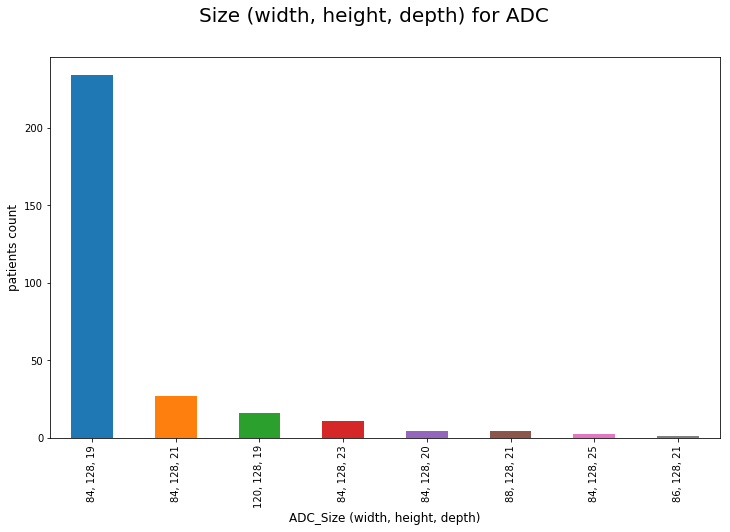

In [345]:
#ADC size histogram

plot_size(adc_folder,adc_tra_images)



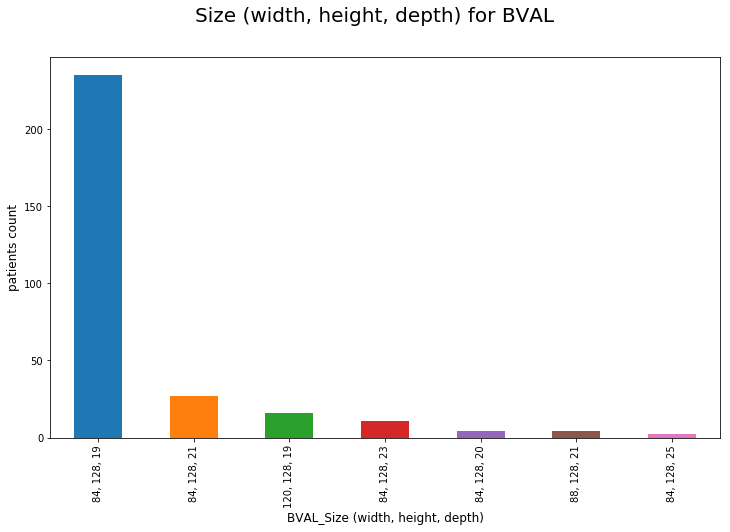

In [346]:
#BVAL size histogram

plot_size(bval_folder,bval_tra_images)



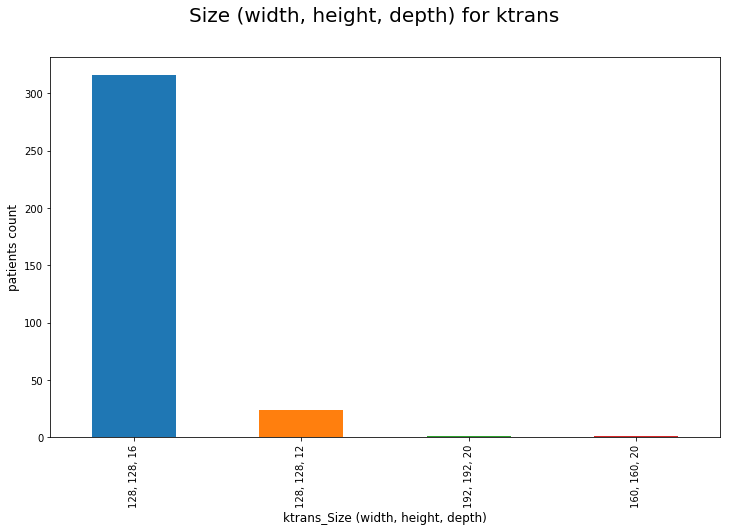

In [347]:
#ktrans size histogram

plot_size(ktrans_folder,ktrans_images)



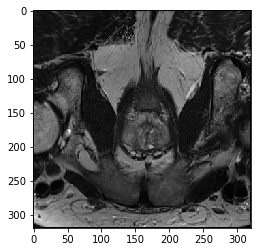

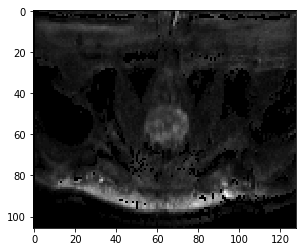

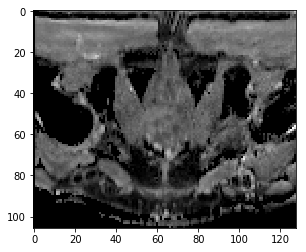

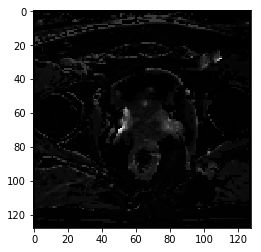

In [349]:
#The next task is to plot intensity histograms for one patient`s MRIs in each modality in transverse plane
#Before this, we should read image, get array with each pixel` intensity and after plot the histogram using appropriate function 

#We will be using patient #0221 MRis

prostate_221_bval = sitk.ReadImage('C://Image Processing/ProstateX/BVAL/diffusie_3Scan_4bval_fsCALC_BVAL_ProstateX_0221.nii')
bval_221_arr=sitk.GetArrayFromImage(prostate_221_bval)

prostate_221_t2 = sitk.ReadImage('C://Image Processing/ProstateX/t2/t2_tse_tra_ProstateX_0221.nii')
t2_221_arr=sitk.GetArrayFromImage(prostate_221_t2)

prostate_221_ADC = sitk.ReadImage('C://Image Processing/ProstateX/ADC/diffusie_3Scan_4bval_fs_ADC_ProstateX_0221.nii')
adc_221_arr=sitk.GetArrayFromImage(prostate_221_ADC)

prostate_221_ktrans = sitk.ReadImage('C://Image Processing/ProstateX/ktrans/ProstateX-0221-Ktrans.mhd')
ktrans_221_arr=sitk.GetArrayViewFromImage(prostate_221_ktrans)

def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

myshow(t2_221_arr,10)
myshow(bval_221_arr,10)
myshow(adc_221_arr,10)
myshow(ktrans_221_arr,10)












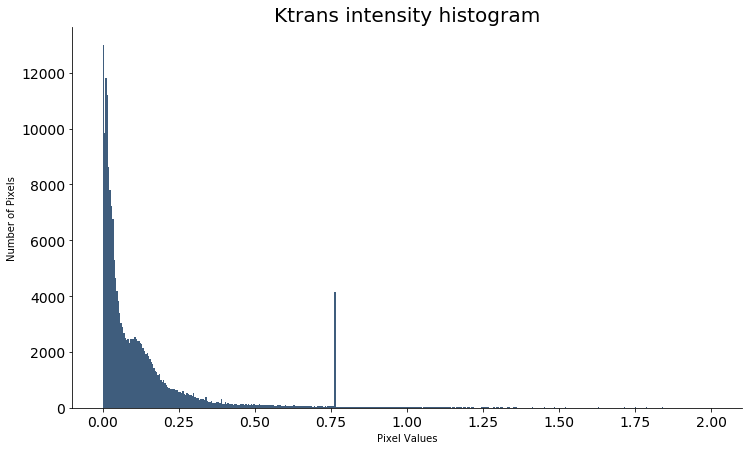

In [316]:
# when all the images were read and we got arrays from them, now we can use them for the plotting intensity histograms

plt.figure(figsize=(12,7))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Ktrans intensity histogram', fontsize=20)

plt.hist(ktrans_221_arr.ravel(),range=(0,2),bins='auto', histtype='bar',density=None,color="#3F5D7D")
plt.xlabel('Pixel Values')
plt.ylabel('Number of Pixels')
plt.show()

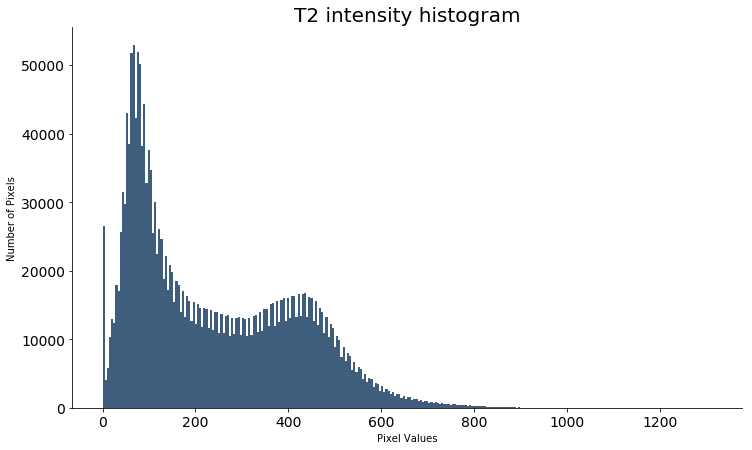

In [317]:
#t2 intensity histmogram

plt.figure(figsize=(12,7))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('T2 intensity histogram', fontsize=20)

plt.hist(t2_221_arr.ravel(),range=None,bins='auto', histtype='bar',color="#3F5D7D")
plt.xlabel('Pixel Values')
plt.ylabel('Number of Pixels')
plt.show()


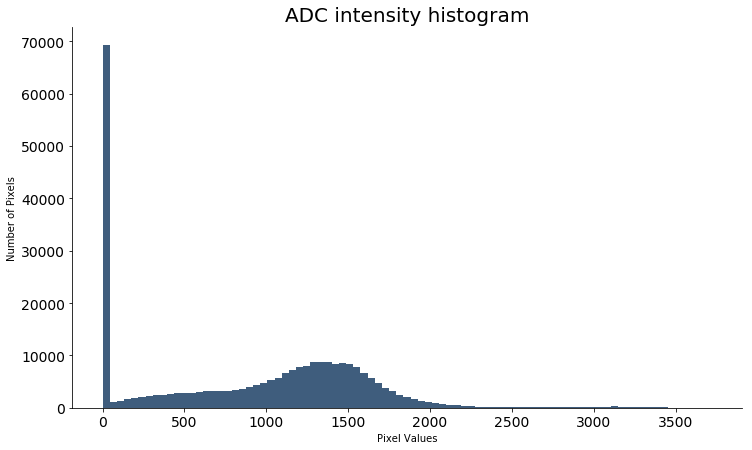

In [318]:
#ADC intensity histogram

plt.figure(figsize=(12,7))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('ADC intensity histogram', fontsize=20)

plt.hist(adc_221_arr.ravel(),bins='auto', histtype='bar',color="#3F5D7D")
plt.xlabel('Pixel Values')
plt.ylabel('Number of Pixels')
plt.show()

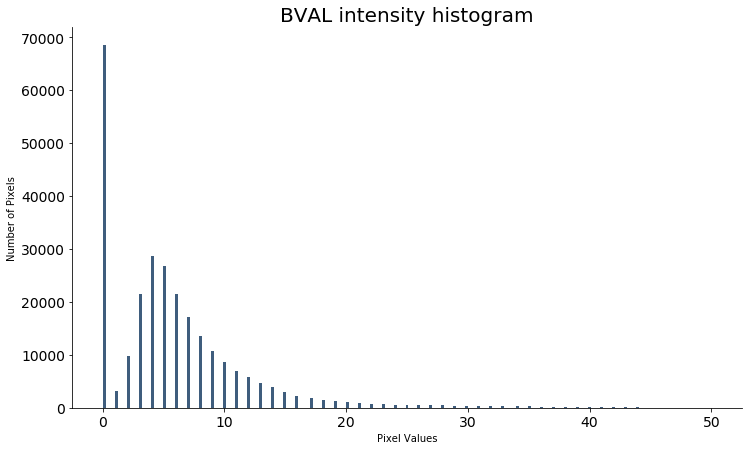

In [330]:
#BVAL intesnity histogram

plt.figure(figsize=(12,7))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('BVAL intensity histogram', fontsize=20)

plt.hist(bval_221_arr.ravel(),range=(0,50),bins='auto', histtype='bar',color="#3F5D7D")
plt.xlabel('Pixel Values')
plt.ylabel('Number of Pixels')
plt.show()